<a href="https://colab.research.google.com/github/Emersonmiady/houses-rent-br/blob/main/alugueis_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aluguéis no Brasil

---


Um dos maiores desafios que as imobiliárias enfrentam é a precificação de seu imóvel, isso porque o mercado é extremamente dinâmico, logo exige um acompanhamento regular das tendências e perspectivas do setor por certos profissionais. Considerando a instabilidade econômica brasileira nesses últimos anos, esse setor adquiriu ainda mais dificuldades para retomar seu crescimento, sendo este um dos fatores que tornaram a precificação em uma tarefa complexa para as empresas.

Existem muitas coisas que um empreendedor nessa área deve se atentar, como a localização do imóvel, a infraestrutura e certas variáveis de mercado, exigindo uma pesquisa bem elaborada e uma precificação coerente, para que o cliente saia satisfeito e feche seu negócio!

<center><img src='https://raw.githubusercontent.com/Emersonmiady/houses-rent-br/main/img/negociation.jpg' width='800' height='450'></center>

Bom, recentemente eu estava navegando pelo *Kaggle* e me deparei com um conjunto de dados a respeito dos valores dos aluguéis em algumas cidades brasileiras. Eu fiquei pensando se seria possível aplicar a análise de dados, alguns conceitos estatísticos e também, alguns algoritmos de *machine learning* para conseguir prever um preço favorável. 

Vamos ver o que é possível fazer com esses dados! :)

<center><img src='https://raw.githubusercontent.com/Emersonmiady/houses-rent-br/main/img/house.jpg' width='1000' height='550'></center>

## Descrição dos dados

---


Esse é um *dataset* provido pelo **Rubens Junior**, um usuário que o publicou em um dos maiores *sites* que disponibilizam dados para a comunidade de *Data Science*, o [*Kaggle*](https://www.kaggle.com/).

De acordo com [esse *link*](https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent), existe a possibilidade de conter alguns valores no *dataset* que são considerados outliers. Tendo em vista que foi utilizado um *WebCrawler* apenas para pegar os dados, os mesmos estão sujeitos a problemas como erros no cadastros.

Segue uma mensagem de Rubens:

- "Eu não tenho propriedade de nenhum desses dados, todos eles foram retirados de informações disponíveis gratuitamente na internet e compilados apenas para facilitar o acesso."

In [1]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [2]:
# Importar os dados
url = 'https://raw.githubusercontent.com/Emersonmiady/houses-rent-br/main/dataset/houses_to_rent_v2.csv'
houses = pd.read_csv(url)

# Exibir o nome das colunas presentes
print('As colunas são:')
display(houses.columns)

As colunas são:


Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

### Dicionário das variáveis
Esse arquivo *csv* possui 13 colunas. São elas:
- **city:** cidade onde o imóvel está localizada;
  - 5 cidades.
- **area:** área do imóvel (m²);
- **rooms:** número de quartos;
  - 1 a 13 quartos.
- **bathroom:** número de banheiros;
  - 1 a 10 banheiros.
- **parking spaces:** número de vagas para automóveis;
  - 1 a 12 vagas.
- **floor:** quantidade de andares que a construção possui;
- **animal:** "aceita animais?";
  - *acept* - aceita;
  - *not acept* - não aceita.
- **furniture:** "é mobiliada?";
  - *furnished* - mobiliada;
  - *not furnished* - não mobiliada.
- **hoa (R\$):** valor do condomínio;
- **rent amount (R\$):** valor do aluguel;
- **property tax (R\$):** IPTU;
- **fire insurance (R\$):** seguro incêndio;
- **total (R\$):** valor total;

## Análise exploratória dos dados

---
### Introdução
<center><img src='https://raw.githubusercontent.com/Emersonmiady/houses-rent-br/main/img/analytics.jpg' width='600' height='300'></center>

Para começar, abaixo temos o formato do *dataset*. Ele apresenta 10692 linhas, ou seja, casas, e 13 colunas, como já mencionado antes.

Uma prática recomendada, antes de iniciarmos a exploração de fato, é conferir se existem dados faltantes nesse *dataframe*. Os dados faltantes podem acabar interferindo na análise, principalmente quando utilizamos *machine learning*, tendo assim que substituí-los por algum outro valor, ou até mesmo retirar a coluna, caso haja uma quantidade elevada deles.

De acordo com as próximas linhas de código, não existem dados faltantes, então nenhuma manipulação será necessária.

In [3]:
# Exibir o formato do Dataframe
print("Formato do Dataframe:", houses.shape, "\n")

# Exibir a quantidade de valores faltantes por coluna
print("Abaixo estão as quantidades de valores faltantes:")
print(houses.isnull().sum(), "\n")

# Definir um estilo para os próximos gráficos
sns.set_style('white')

# Exibir as 5 primeiras linhas
print("Uma prévia dos dados:")
display(houses.head())

Formato do Dataframe: (10692, 13) 

Abaixo estão as quantidades de valores faltantes:
city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64 

Uma prévia dos dados:


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
# Exibir algumas informações
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Uma coisa estranha que eu notei, é que a coluna *floor* está representado como objeto, sendo que essa seria o número de andares. Vamos ver melhor o que está acontecendo.

In [5]:
# Exibir valores únicos de "floor"
print(houses.floor.unique())

['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']


Parece que existe um dado "-", podendo significar um valor não informado ou até mesmo igual a 0. Então vamos transformá-lo em número e a coluna inteira também!

In [6]:
# Transformar o "floor" em número inteiro
houses['floor'] = houses['floor'].replace('-', 0).astype(int)
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


Em seguida, exibirei algumas estatísticas importantes:

In [7]:
# Exibir estatísticas
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
floor,10692.0,5.067995,6.069050,0.0,1.00,3.0,8.0,301.0
hoa (R$),10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent amount (R$),10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property tax (R$),10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire insurance (R$),10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0
total (R$),10692.0,5490.487000,16484.725912,499.0,2061.75,3581.5,6768.0,1120000.0


Podemos notar que algumas variáveis como a área, valor do condomínio, IPTU e valor total, apresentam um alto desvio padrão (*std*)!

Isso significa que a dispersão desses dados é alta, podendo conter valores que são muito diferentes do normal (potenciais *outliers*), erros de cadastro ou falha na captação de casas pelo *webScrapping*.

Okay, mas falando em quantidades, como estão distribuídos os valores do aluguel e o total que teríamos que pagar? 

Para responder a essa pergunta, fiz uma função que mostra o histograma e o *boxplot* de cada uma dessas variáveis. Agora é só visualizar.

In [8]:
# Fazer uma função que exibe histograma e boxplot em sequência
def show_histogram_boxplot(col, dataset):
  plt.figure(figsize=(12,12))

  plt.subplot(2, 1, 1)
  ax = sns.distplot(dataset[col])

  plt.subplot(2, 1, 2)
  sns.boxplot(dataset[col])

  plt.show()
  return;

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


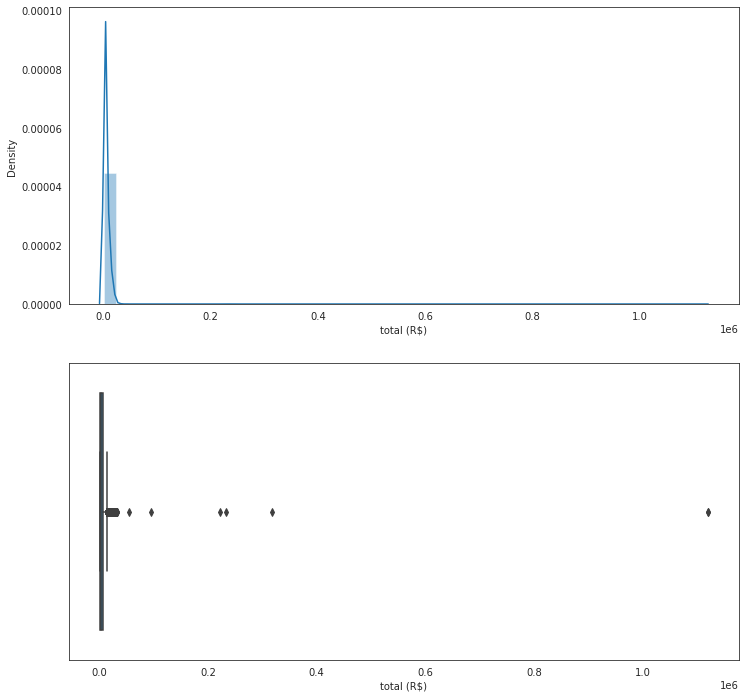

In [9]:
# Exibir histograma e boxplot de "total (R$)"
show_histogram_boxplot('total (R$)', houses)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


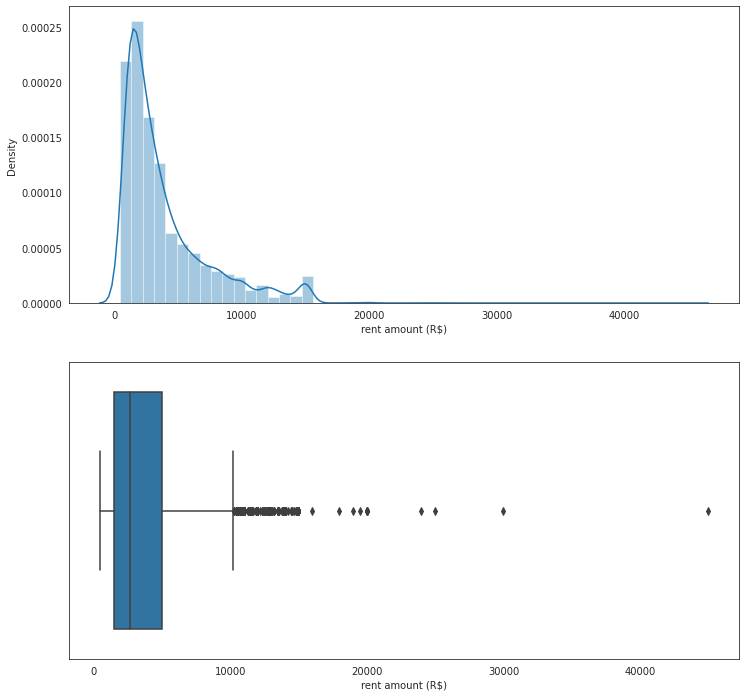

In [10]:
# Exibir histograma e boxplot de "rent amount (R$)"
show_histogram_boxplot('rent amount (R$)', houses)

Desses gráficos, notamos que:
- A maioria dos valores totais estão distribuídos abaixo de 20 mil reais;
- A maioria dos valores de aluguel estão abaixo dos 10 mil reais, aproximadamente.

Observação: o eixo y do histograma está em porcentagem.

### Existe correlações entre as variáveis?
Será que existe alguma relação linear entre duas variáveis quantitativas? Em outras palavras, se duas classes aumentam/diminuem juntas?

Vamos explorar isso pelos coeficientes de correlação de Pearson, além dos gráficos de dispersão. 

Lembrando que os valores de correlação, variam de -1 a 1, tendo uma relação:
- Positiva: perto de 1;
- Negativa: perto de -1;
- Neutra (nenhuma): perto de 0.

Observação: para nós aplicarmos algumas visualizações entre as variáveis numéricas, seria interessante as separarmos do conjunto de dados antes.

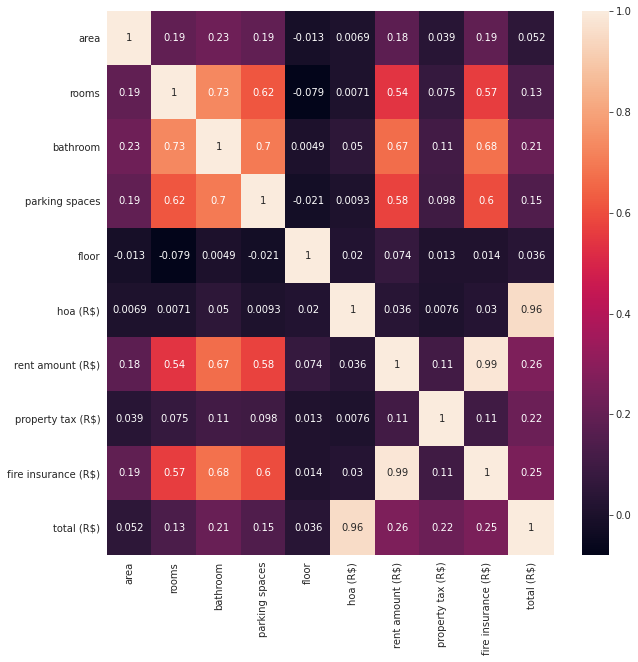

In [11]:
# Dividir o dataset em dados numéricos
houses_numerical = houses[houses.dtypes[houses.dtypes != 'object'].index]

# Exibir heatmap (mapa térmico de correlação)
houses_correlated = houses_numerical.corr()

plt.figure(figsize=(10,10))
houses_heatmap = sns.heatmap(houses_correlated, annot=True)
plt.show()

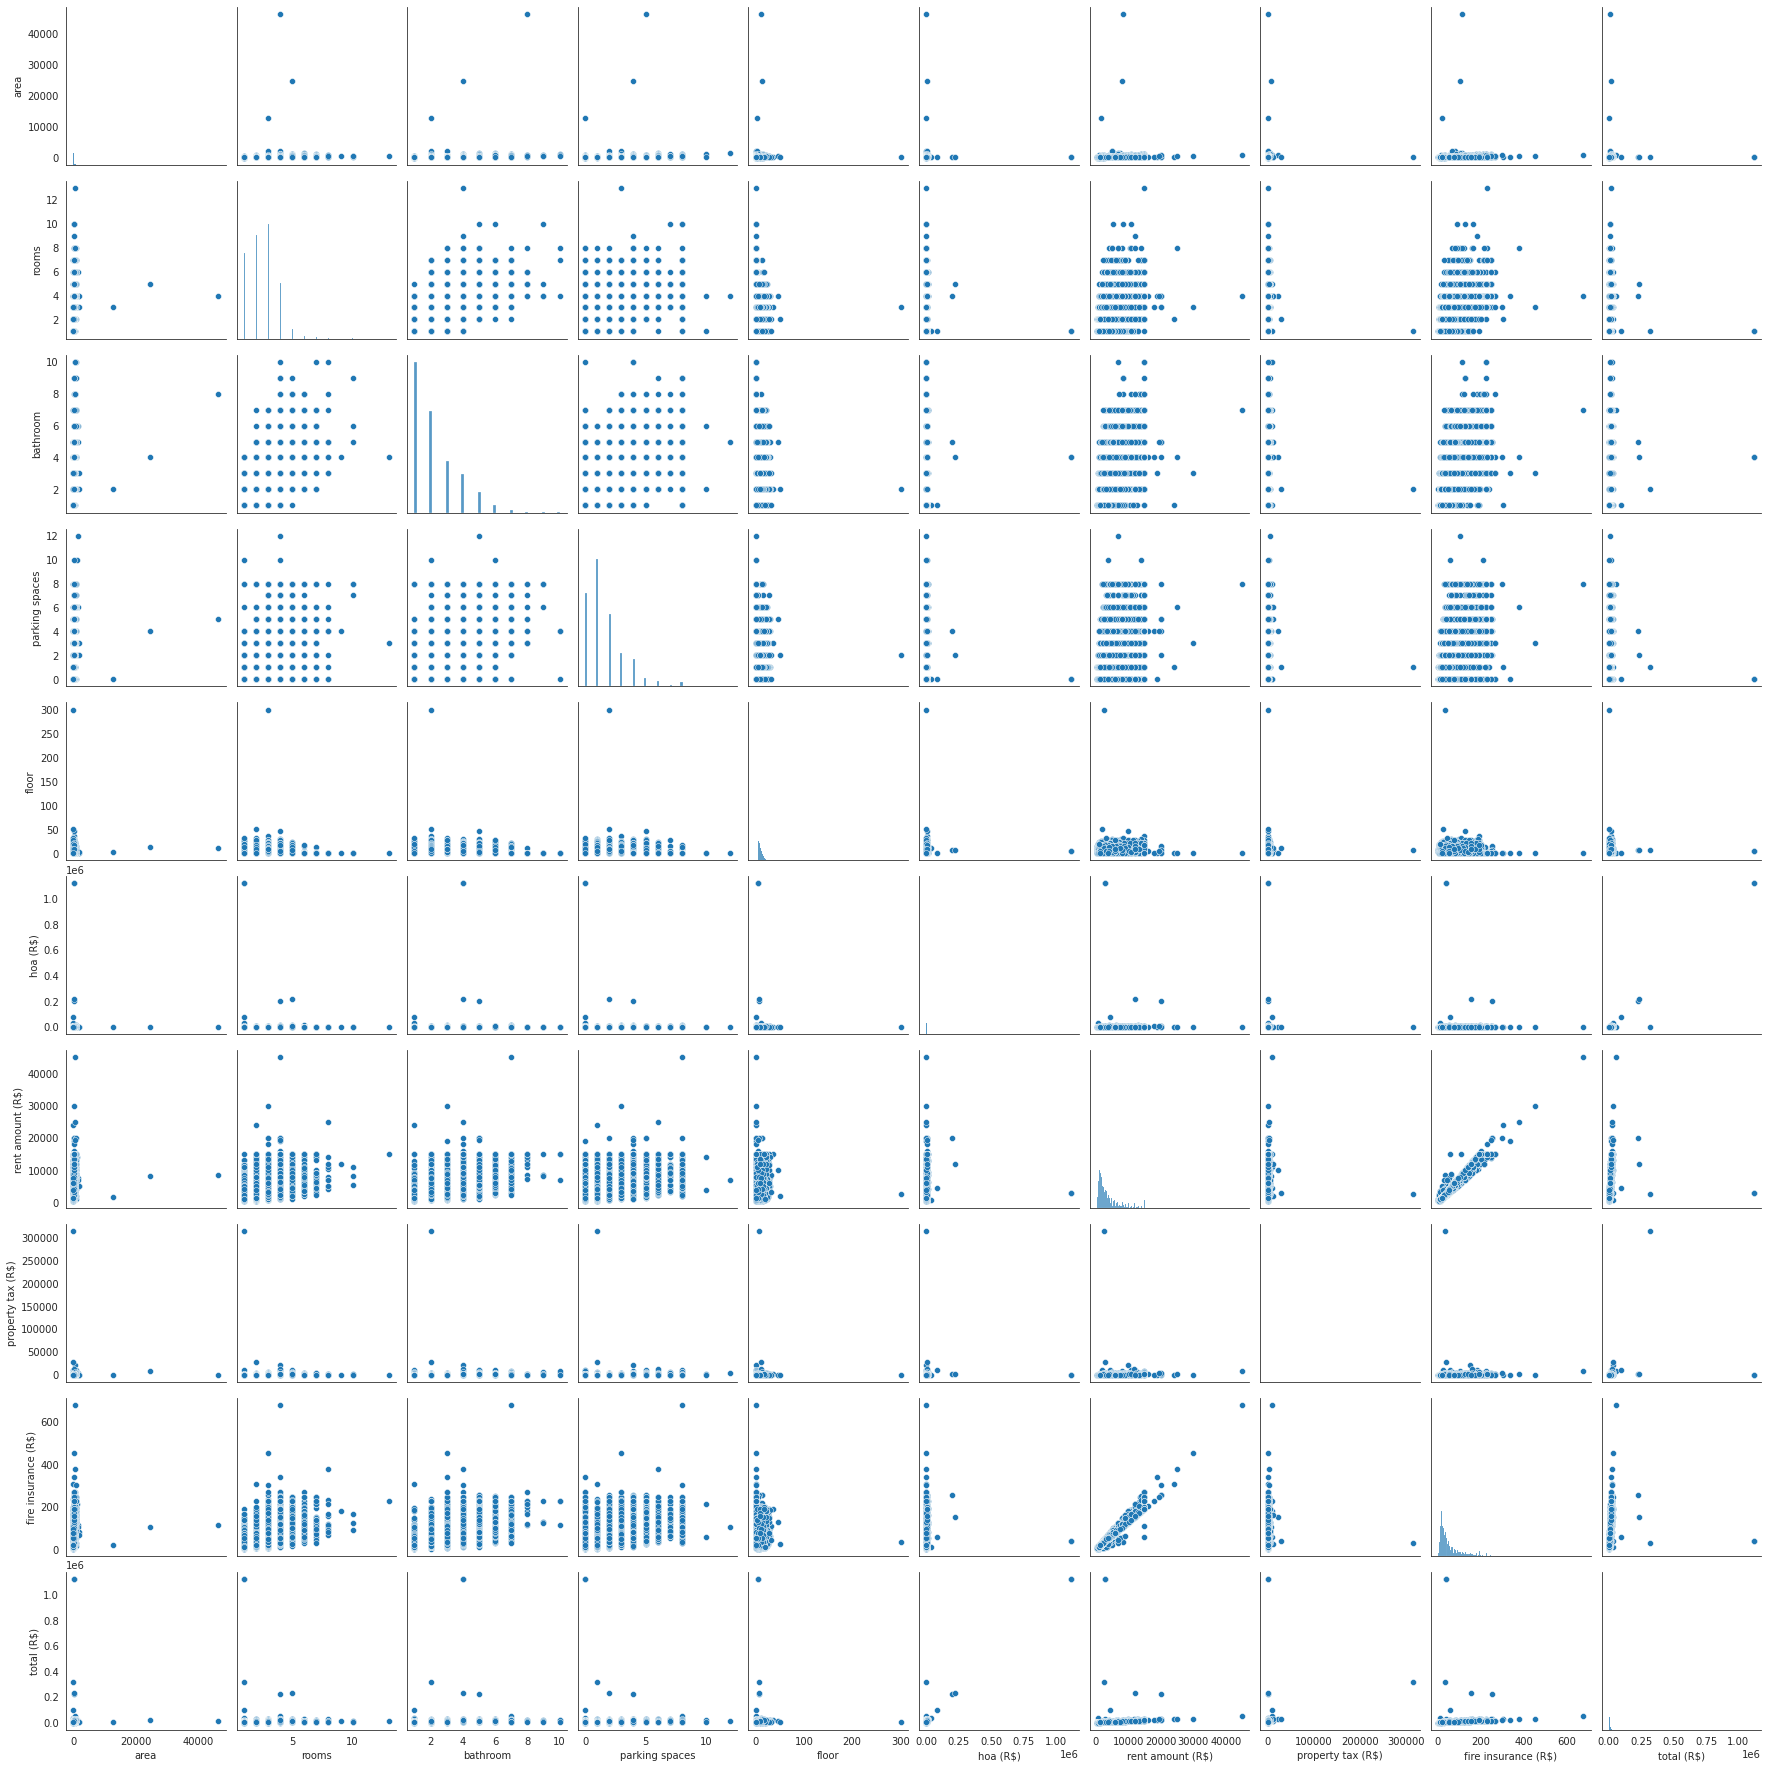

In [12]:
# Exibir todos os scatterplots possíveis
sns.pairplot(houses_numerical)
plt.show()

Aparentemente, as variáveis que chegam perto de uma reta, são *fire insurance (R\$)* com *rent amount (R\$)*, tendo 0,99 de correlação!

Assim poderíamos deduzir que, somente pelo alto valor de seguro incêndio, teríamos que pagar um aluguel mais caro...

### Analisando os dados por categorias
Antes de tirar algumas informações desse conjunto, vamos ver quantas casas por cidade existem:

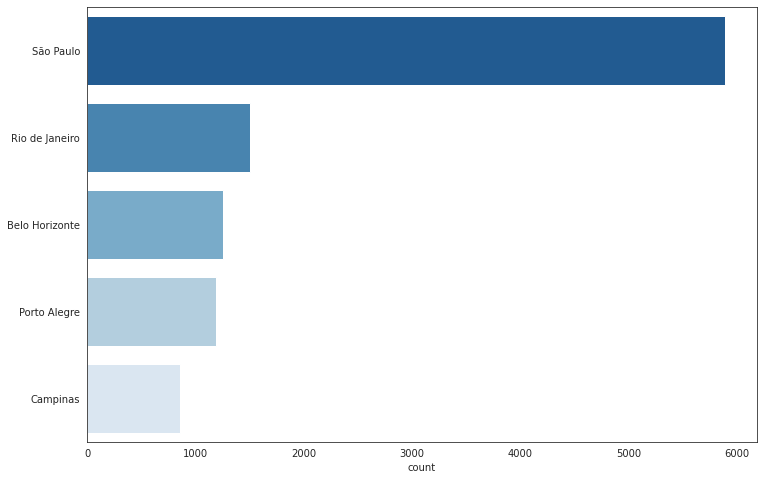

In [13]:
# Exibir a quantidade de casas por cidade
plt.figure(figsize=(12, 8))
houses_count = pd.DataFrame(houses['city'].value_counts().rename('count'))
sns.barplot(x=houses_count['count'], y=houses_count.index, palette='Blues_r')
plt.show()

Há uma quantidade muito maior de casas em São Paulo nesse *dataset*.

E quanto aos "valores médios" do aluguel total por localidade?

Se pensarmos na média, podemos estar nos baseando em medidas falsas, pois podem conter *outliers* que distorcem muito a realidade. Vamos ver na prática como isso acontece:

,city,total mean (R$)
0,São Paulo,6380.831833
1,Belo Horizonte,6315.242448
2,Rio de Janeiro,4611.684877
3,Campinas,3173.276671
4,Porto Alegre,2989.782900


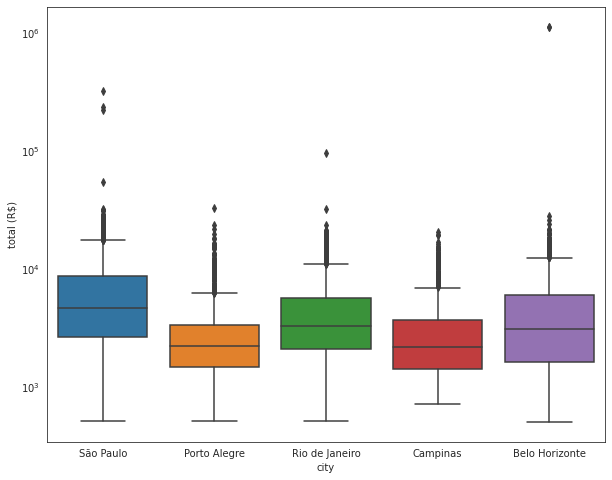

In [14]:
# Exibir a média do "total (R$)" por cidade
houses_total_ordered_mean = houses.groupby('city')['total (R$)'].mean().sort_values(ascending = False).rename('total mean (R$)')
display(houses_total_ordered_mean.reset_index())
print('\n')

# Exibir boxplot do "total (R$)" por cidade
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='city', y='total (R$)', data=houses)
ax.set_yscale('log')
plt.show()

Como o esperado, existem valores discrepantes que podem alterar muito a média. Imagine o maior valor de Belo Horizonte, aquele ponto acima dos 100 mil reais, alteraria a média de forma grotesca, sendo que é um caso muito isolado!

Uma solução, é pegar a mediana de cada valor por cidade. Aqui temos a medida nos 50% dos dados, ou seja, um valor muito mais representativo.

In [15]:
# Exibir a mediana do valor total por cidade
houses_total_ordered_median = houses.groupby('city')['total (R$)'].median().sort_values(ascending = False).rename('total median (R$)')

display(houses_total_ordered_median.reset_index())

,city,total median (R$)
0,São Paulo,4596
1,Rio de Janeiro,3253
2,Belo Horizonte,3040
3,Porto Alegre,2211
4,Campinas,2140


Pelo visto a cidade com a medida mais alta ainda é São Paulo, mas repare que a ordem das cidades, do maior valor ao menor, acabou mudando! Além de que houve uma diminuição, em reais, considerável.

Agora podemos supor que Campinas é a cidade mais aconselhavel para se alugar uma casa, por conta de seu preço mediano baixo. Entretanto, podemos acabar encontrando menos casas para se alugar, enquanto que São Paulo pode ser mais fácil, presumindo pela quantidade de dados nesse conjunto.

Algumas informações que eu gostaria de saber também são:
- Existem mais casas que aceitam animais ou não?
- O aluguel se altera muito com a liberação de animais na casa?
- A maioria das casas por cidade são imobiliadas?
- Há uma alta variação no aluguel com a casa sendo imobiliada?
- Qual a quantidade de casas pelo número de andares?
- Quantos cômodos, banheiros e vagas normalmente as casas possuem?

Antes de tentar chegar a algumas respostas, fiz uma função que exibe um gráfico de barras para variáveis quantitativas, as quais possuem 2 únicos valores, ao lado de outro que exibe essas variáveis por cidade.

In [16]:
# Fazer a função dos dois gráficos citados acima
def show_two_barplots(x_col, city, data):
  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  sns.countplot(x=x_col, data=data)

  plt.subplot(1, 2, 2)
  sns.countplot(x=city, hue=x_col, data=data)
  plt.show()
  return;

#### Sobre os animais
Vamos primeiramente ver a contagem das casas que aceitam animais:

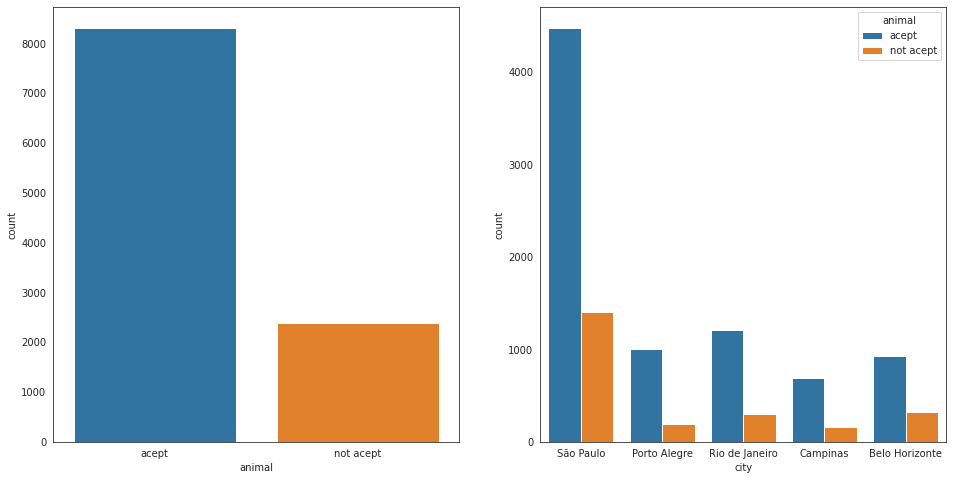

In [17]:
# Exibir contagem das casas que aceitam animais e contagem disso por cidade
show_two_barplots('animal', 'city', houses)

Bom, existem muito mais casas que aceitam animais! Isso olhando para qualquer cidade, a diferença em quantidades é muito alta.

 A cidade que mais se destaca, pelo menos no tamanho da barra, é São Paulo, atingindo um número acima de 4000 casas que aceitam esses mascotes.

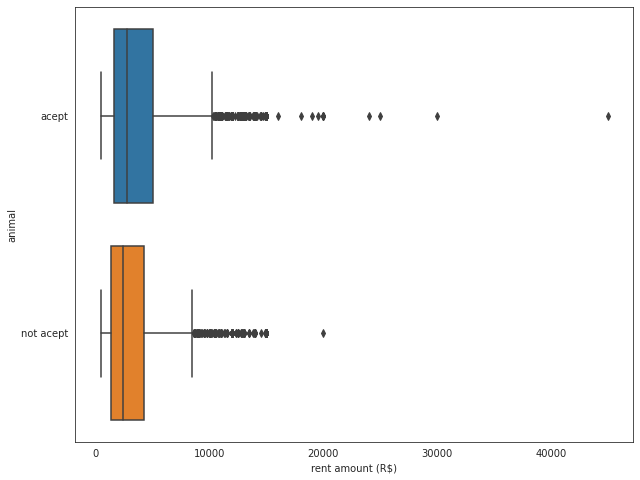

In [18]:
# Exibir boxplot de "animal" com "rent amount (R$)"
plt.figure(figsize=(10, 8))
sns.boxplot(x='rent amount (R$)', y='animal', data=houses)
plt.show()

A variedade dos preços que aceitam animais também é maior, atingindo 75% dos valores em até 10 mil reais. Entretanto, a faixa de preços das duas categorias não se diferencia muito, na grande parte das casas.

#### Sobre ser mobiliada
Novamente a contagem das casas que são mobiliadas ou não segue abaixo:

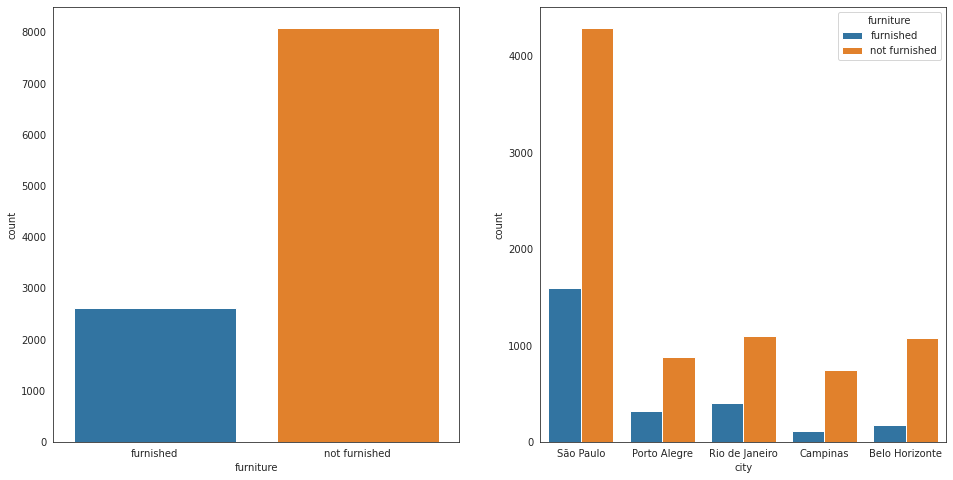

In [19]:
# Exibir contagem das casas que são imobiliadas e contagem disso por cidade
show_two_barplots('furniture', 'city', houses)

Existem muito mais casas que não são mobiliadas! Em todas as casas, essa afirmação não é uma exceção. 

Da mesma forma das casas que possibilitam a entrada de animais, São Paulo tem uma contagem expressiva nos valores que não são mobiliadas.

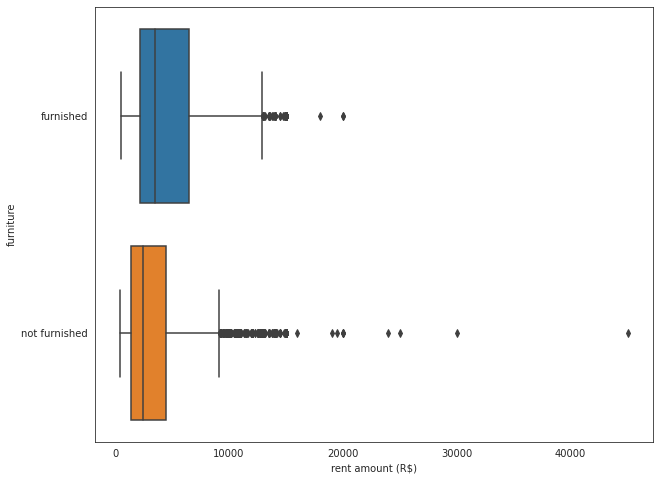

In [20]:
# Exibir boxplot de "furniture" com "rent amount (R$)"
plt.figure(figsize=(10, 8))
sns.boxplot(x='rent amount (R$)', y='furniture', data=houses)
plt.show()

O *boxplot* azul nos diz que o preço da maioria das casas mobiliadas (75%) cobre um intervalo maior que as não mobiliadas. Enquanto que o laranja possui casas com valores que não variam muito, tendo uma concentração deles abaixo dos 10 mil reais!

Podemos notar também que o último tem um número maior de *outliers*, além de que alguns, são valores bem mais altos se comparado com a primeira caixa (o maior valor das casas não mobiliadas passa de 40000 reais!).

Sendo assim, podemos dizer que as casas não mobiliadas, em sua grande parte, apresentam preços menores que as mobiliadas, mas que podem existir valores acima destas.

#### Sobre os andares
Abaixo é mostrado a quantidade de casas pelo número de andares que determinada construção possui.

Lembre-se que a variável `floor` tinhamos valores com "-", ou seja, não sabemos o real significado disso, pode ser que muitos dados da quantidade de andares estejam indisponíveis, e a troca pelo 0 no caso, não estaria fazendo sentido.

Sendo assim, vou plotar o gráfico de barras para ver como estão distribuídas de acordo com os andares, entretanto, não é uma boa variável para o *Machine Learning*, dado que não sabemos o que o "-" significa, além de termos dados muito estranhos, como por exemplo, "301 andares"...

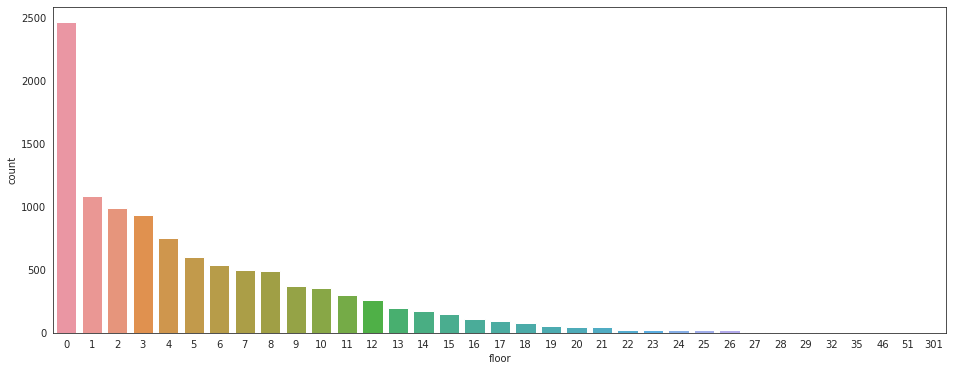

In [21]:
# Exibir barplot de "floor"
plt.figure(figsize=(16, 6))
sns.countplot(x='floor', data=houses)
plt.show()

#### Sobre as outras variáveis
Vamos observar como estão distribuídos os dados de algumas variáveis, por meio de *barplots* e *violinplots*:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


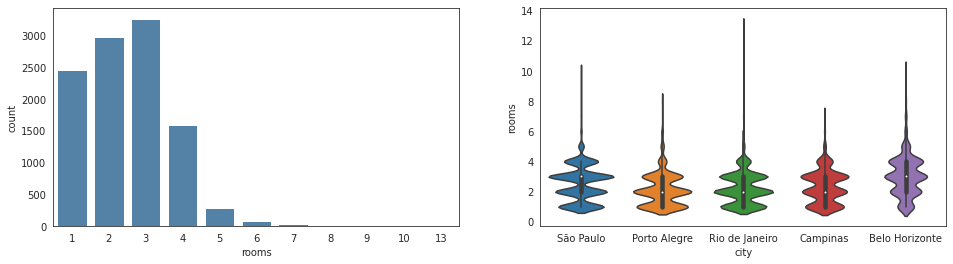

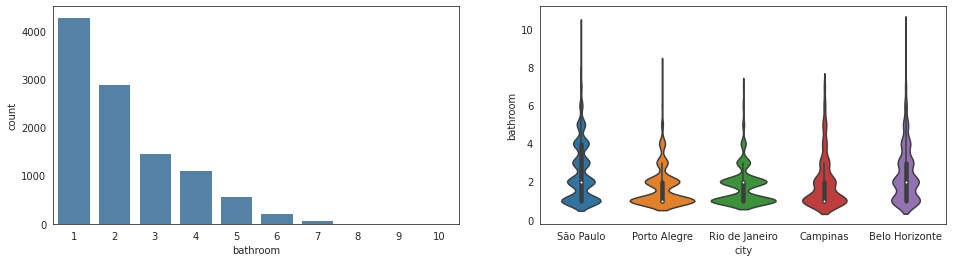

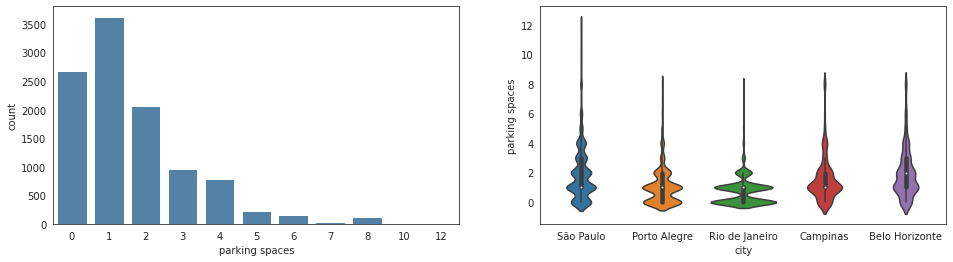

In [22]:
# Exibir countplot de "rooms","bathroom" e "parking spaces" junto dos violinplots dessas variáveis, por cidade
some_variables = ['rooms', 'bathroom', 'parking spaces']

for variable in some_variables:
  plt.figure(figsize=(16, 4))
  plt.subplot(1, 2, 1)
  sns.countplot(houses[variable], color='steelblue')

  plt.subplot(1, 2, 2)
  sns.violinplot(x='city', y=variable, data=houses)
plt.show()

Observações:
- Pela lei da oferta e da procura, as pessoas buscam casas que possuem de:
  - 1 a 3 cômodos, com 3 sendo a prefência;
  - 0 a 2 vagas de automóveis, com 1 vaga preferencialmente;
  - 1 a 2 banheiros.
- A maioria das casas possuem até 2 banheiros, sendo assim, mais do que isso, normalmente não é tão procurado pelas pessoas;
- Sobre os *violinplots*, eles se comportam de forma parecida com as informações anteriores, para todas as cidades.



## *Machine Learning*

---


Para finalizar, vou aplicar alguns modelos de *machine learning* e definir qual é aquele com a melhor previsão. Em resumo, o que acontece é que o computador consegue, a partir de funções matemáticas (não explicadas nesse *notebook*), encontrar padrões para enfim, prever as futuras entradas.

O processo segue algumas etapas, como retirar as colunas que eu não quero rodar no código e também, as que ficam redundantes por transformá-las em variáveis "*dummies*". Em seguida, dividimos o *dataset* em "treino" e "teste", como meio de conseguir testar o quanto aquele algoritmo é confiável. Então vamos a prática!

<center><img src='https://raw.githubusercontent.com/Emersonmiady/houses-rent-br/main/img/robot.jpg' width='700' height='400'></center>

Como já dito, irei desconsiderar a coluna `floor`, pois ela pode nos atrapalhar!

Uma coluna que também pode ser ruim deixar é `hoa (R$)`, pois ela depende dos municípios e não das cidades em si, algo que não é possível controlar e acaba saindo do escopo desse conjunto de dados... É uma coisa que não quero deixar nos modelos.

In [23]:
# Retirar as colunas indesejáveis
houses.drop(['floor', 'hoa (R$)'], axis=1, inplace=True)

In [24]:
# Transformar as variáveis qualitativas em dummies
houses_dummies = pd.get_dummies(houses)
display(houses_dummies.head())

,area,rooms,bathroom,parking spaces,rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished
0,70,2,1,1,3300,211,42,5618,0,0,0,0,1,1,0,1,0
1,320,4,4,0,4960,1750,63,7973,0,0,0,0,1,1,0,0,1
2,80,1,1,1,2800,0,41,3841,0,0,1,0,0,1,0,0,1
3,51,2,1,0,1112,22,17,1421,0,0,1,0,0,1,0,0,1
4,25,1,1,0,800,25,11,836,0,0,0,0,1,0,1,0,1


In [25]:
# Retirar algumas colunas redundantes
houses_dummies.drop(['city_São Paulo',
                     'animal_not acept',
                     'furniture_not furnished'], inplace=True, axis=1)

In [26]:
# Exibir novamente as 5 primeiras linhas desse novo dataframe
display(houses_dummies.head())

,area,rooms,bathroom,parking spaces,rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,animal_acept,furniture_furnished
0,70,2,1,1,3300,211,42,5618,0,0,0,0,1,1
1,320,4,4,0,4960,1750,63,7973,0,0,0,0,1,0
2,80,1,1,1,2800,0,41,3841,0,0,1,0,1,0
3,51,2,1,0,1112,22,17,1421,0,0,1,0,1,0
4,25,1,1,0,800,25,11,836,0,0,0,0,0,0


In [27]:
# Dividir o dataset em treino e teste
X = houses_dummies.drop('rent amount (R$)', axis=1).values
y = houses_dummies['rent amount (R$)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

# Definir um local para armazenar os scores
accuracy = []

Antes de ir para os modelos regressivos, vou padronizar os dados contínuos.

In [28]:
# Padronizar os dados numéricos
sc = StandardScaler()
X_train[:, :7] = sc.fit_transform(X_train[:, :7])
X_test[:, :7] = sc.transform(X_test[:, :7])

Vou agora aplicar os algoritmos e ver suas pontuações, sendo eles:
- *K-Neighbors Regressor*;
- *Linear Regression*;
- *Ridge Regression*;
- *Lasso Regression*;
- *Decision Tree Regressor*;
- *Random Forest Regressor*.

**Observação:** as previsões são avaliadas a partir do R² (coeficiente de determinação).

In [29]:
# Definir os modelos
knn = KNeighborsRegressor()
reg = LinearRegression()
ridge = Ridge(alpha=0.1, normalize=True, random_state=0)
lasso = Lasso(alpha=0.1, normalize=True, random_state=0)
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)

models = [knn, reg, ridge, lasso, dt, rf]
model_names = ['K-Neighbors Regressor', 'Linear Regression', 
               'Ridge Regression', 'Lasso Regression', 
               'Decision Tree Regressor', 'Random Forest Regressor']

In [30]:
# Classificá-los pela melhor previsão
for model in models:
  model.fit(X_train, y_train)
  model_score = model.score(X_test, y_test)
  accuracy.append(model_score)

accuracy_named = pd.DataFrame(accuracy, columns=['score'], index=model_names)
display(accuracy_named.sort_values('score', ascending=False))

,score
Random Forest Regressor,0.861867
Decision Tree Regressor,0.857977
K-Neighbors Regressor,0.817782
Ridge Regression,0.753687
Lasso Regression,0.606317
Linear Regression,0.499206


Top! Agora sabemos que o algoritmo *Random Forest Regressor* é o melhor, por sua mais alta performance! Vamos ver o gráfico de linhas das minhas variáveis teste e predição:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


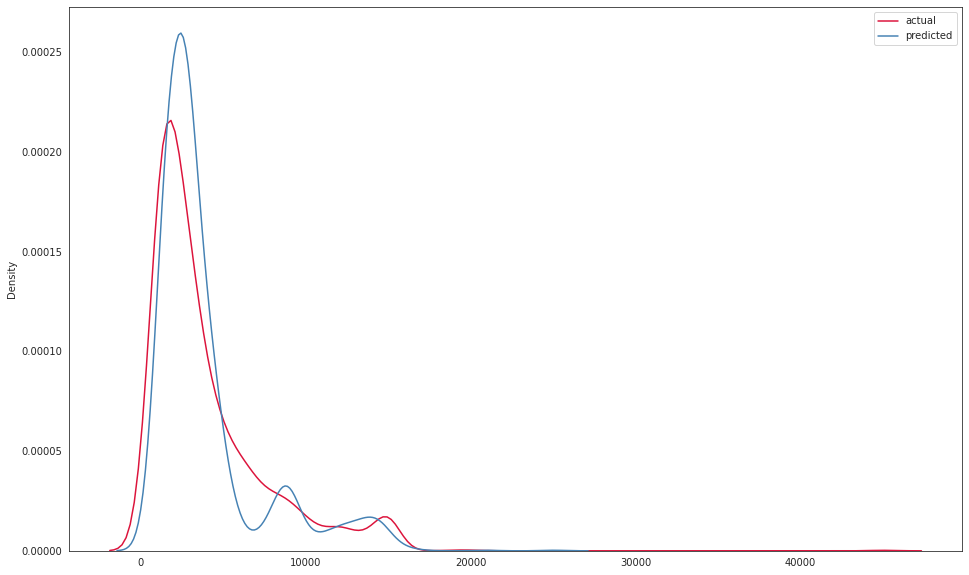

In [31]:
# Exibir gráfico de linha para "rent amount (R$)" atual e que foi predito
plt.figure(figsize=(16, 10))
y_pred = rf.predict(X_test)
sns.distplot(y_test, hist=False, kde=True, color='crimson', label='actual')
sns.distplot(y_pred, hist=False, kde=True, color='steelblue', label='predicted')
plt.legend()
plt.show()

Me parece que foi feito um ótimo trabalho!

Enfim, o mais legal dessa parte de *machine learning* é que conseguimos testar situações hipotéticas. Por exemplo, se eu fosse querer vender um imóvel, com as seguintes características:
- Área de 250 m²;
- 3 quartos;
- 2 banheiros;
- 1 vaga;
- Valor do condomínio (aproximado): R\$ 1700;
- Valor do seguro incêndio (aproximado): R\$ 60;
- Valor total exigido pelo cliente (aproximado): R\$ 8000;
- Localizada em São Paulo;
- Permissão da entrada de animais;
- Não sendo mobiliada.


In [32]:
houses_dummies.head()

,area,rooms,bathroom,parking spaces,rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,animal_acept,furniture_furnished
0,70,2,1,1,3300,211,42,5618,0,0,0,0,1,1
1,320,4,4,0,4960,1750,63,7973,0,0,0,0,1,0
2,80,1,1,1,2800,0,41,3841,0,0,1,0,1,0
3,51,2,1,0,1112,22,17,1421,0,0,1,0,1,0
4,25,1,1,0,800,25,11,836,0,0,0,0,0,0


In [33]:
# Vamos testar
my_house = np.array([250, 3, 2, 1, 1700, 60, 8000, 0, 0, 0, 0, 1, 0]).reshape(1, -1)
my_house[:, :7] = sc.transform(my_house[:, :7])
print(my_house)

[[0 0 0 0 1 0 0 0 0 0 0 1 0]]


In [34]:
print("Seria recomendado um aluguel de R$", round(rf.predict(my_house)[0], 2))

Seria recomendado um aluguel de R$ 5054.35


## Conclusão

---


Pelo visto, conseguimos tirar alguns *insights* legais e investigar um pouco sobre a variação do preço de aluguéis em 5 cidades distintas, sendo elas São Paulo, Campinas, Rio de Janeiro, Belo Horizonte e Porto Alegre.

Aparentemente, se eu fosse precificar o aluguel de uma casa, com as configurações já citadas, ofereceria um valor de 5054.35 reais!

Bom, minha análise se encerra por aqui, espero que esse *notebook* seja útil para alguma pessoa. :D

Muito obrigado!